# Word adjacencies network
by ANANTAPRAYOON Panatchakorn

for Data Science for Transdisciplinary Research (Ⅱ) class's final report

## Import files, Visualize network graph
About data: 

[Word adjacencies](http://www-personal.umich.edu/~mejn/netdata/adjnoun.zip) is a data of adjacency network of 112 common adjectives and nouns in the novel David Copperfield by Charles Dickens. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(1)

In [2]:
G = nx.read_gml('./adjnoun.gml')

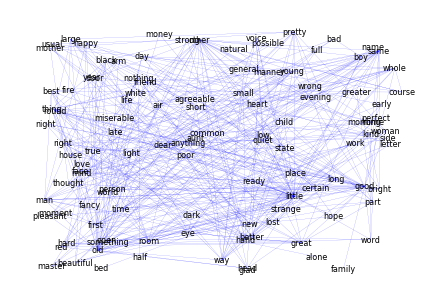

In [3]:
# Visualize in random layout (注：output could be diffrent due to random seed)
nx.draw(G, pos=nx.random_layout(G), with_labels=True,  font_size=8, node_size=0, edge_color="blue", width=0.1)
plt.show()

## Node, Edge, Degree distribution

### Nodes, edges, connected components, average degree
We can interpret degree of a node as number of Noun-Noun, Adjective-Noun, or Adjective-Adjective combination of a word found.


In [4]:
n_nodes = nx.number_of_nodes(G)
n_edges = nx.number_of_edges(G)
n_con_comp = nx.number_connected_components(G)
avg_deg = 2*n_edges/n_nodes
print(f"no. of nodes: {n_nodes}")
print(f"no. of edges: {n_edges}")
print(f"no. of connected components: {n_con_comp}")
print(f"average degree: {avg_deg}")

no. of nodes: 112
no. of edges: 425
no. of connected components: 1
average degree: 7.589285714285714


Despite the average degree being 7, the highest degree found is 49. We can notice that most words are adjective, which can have lots of adjacence with other adjectives and nouns.

In [5]:
# Sort word based on degree in descending order
# Degree shows numbers of adjecent words
deg_sorted = sorted(G.degree(), key=lambda e: e[1], reverse=True)
print(deg_sorted[:10])

[('little', 49), ('old', 33), ('other', 28), ('good', 28), ('same', 21), ('first', 17), ('room', 15), ('way', 15), ('dear', 15), ('man', 14)]


### Degree distribution
Despite small data size, from the graph, we can observe that:
- In normal scale, it forms an exponential distribution
- In log scale, it forms a linear line

In [6]:
# Make a degree distribution
deg_seq = sorted([d for n,d in G.degree()], reverse=True)
print(np.unique(deg_seq, return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 21,
       28, 33, 49]), array([10, 12, 10,  5, 11, 13, 12,  3,  4,  8,  2,  6,  4,  3,  3,  1,  1,
        2,  1,  1]))


[0.08928571 0.10714286 0.08928571 0.04464286 0.09821429 0.11607143
 0.10714286 0.02678571 0.03571429 0.07142857 0.01785714 0.05357143
 0.03571429 0.02678571 0.02678571 0.00892857 0.00892857 0.01785714
 0.00892857 0.00892857]


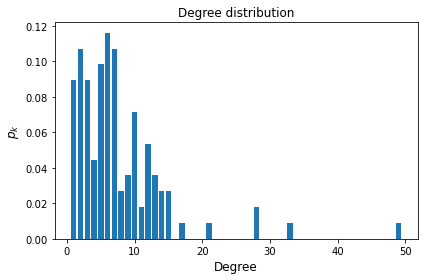

In [7]:
degree = np.unique(deg_seq, return_counts=True)[0]
p_k = np.unique(deg_seq, return_counts=True)[1]/n_nodes
print(p_k)

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(degree, p_k)
ax.set_title("Degree distribution")
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("$p_k$", fontsize=12)
fig.tight_layout()
plt.show()

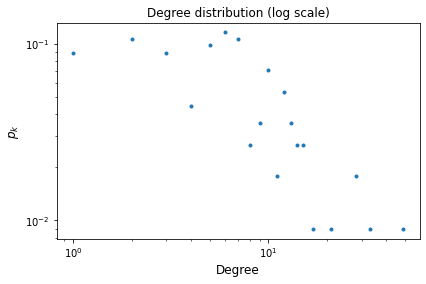

In [8]:
# log plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degree, p_k, marker='.', linestyle="")
ax.set_title("Degree distribution (log scale)")
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("$p_k$", fontsize=12)
fig.tight_layout()
plt.xscale("log")
plt.yscale("log")
plt.show()

### A subgraph of edges connected to node with highest degrees 
- "little": has the highest number of adjacent words (degree). Interesting point is that "little" can be either adjective or adverb, so it can be combined with many more words comparing to other word types.

no. of edges: 49


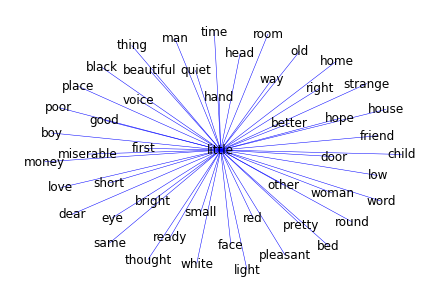

In [9]:
# Graph of adjacent words with 'little'
edges_little = [e for e in G.edges() if 'little' in e]
G_little = nx.Graph()
for e in edges_little:
    G_little.add_edge(e[0],e[1])
print(f"no. of edges: {G_little.number_of_edges()}")
nx.draw(G_little, pos=nx.spring_layout(G_little), with_labels=True, edge_color='blue', node_size=0, width=0.5)
plt.show()

no. of edges: 33


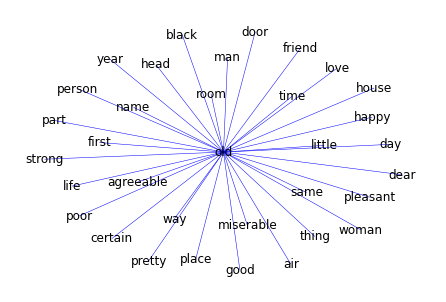

In [10]:
# Graph of adjacent words with 'old'
edges_old = [e for e in G.edges() if 'old' in e]
G_old = nx.Graph()
for e in edges_old:
    G_old.add_edge(e[0],e[1])
print(f"no. of edges: {G_old.number_of_edges()}")
nx.draw(G_old, pos=nx.spring_layout(G_old), with_labels=True, edge_color='blue', node_size=0, width=0.5)
plt.show()

no. of edges: 28


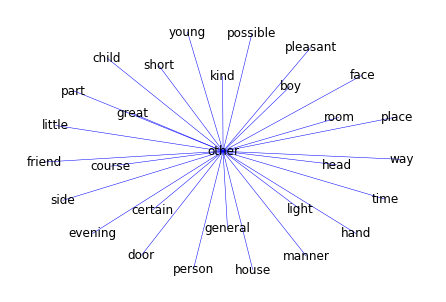

In [11]:
# Graph of adjacent words with 'other'
edges_other = [e for e in G.edges() if 'other' in e]
G_other = nx.Graph()
for e in edges_other:
    G_other.add_edge(e[0],e[1])
print(f"no. of edges: {G_other.number_of_edges()}")
nx.draw(G_other, pos=nx.spring_layout(G_other), with_labels=True, edge_color='blue', node_size=0, width=0.5)
plt.show()

no. of edges: 28


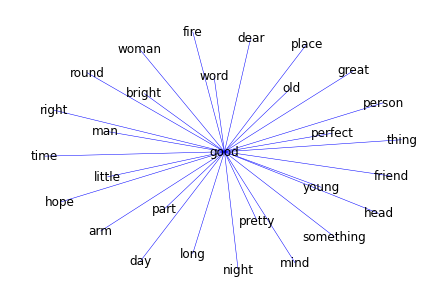

In [12]:
# Graph of adjacent words with 'good'
edges_good = [e for e in G.edges() if 'good' in e]
G_good = nx.Graph()
for e in edges_good:
    G_good.add_edge(e[0],e[1])
print(f"no. of edges: {G_good.number_of_edges()}")
nx.draw(G_good, pos=nx.spring_layout(G_good), with_labels=True, edge_color='blue', node_size=0, width=0.5)
plt.show()

## Centrality
Knowing centrality can help in choosing starting point of word searching from adjacent words. For example, searching a word "little" starting from word "other", first we look at an adjacent word of "other", then we repeatedly check adjacent word of the word until we find "little".   

In [13]:
# Degree Centrality (次数中心性)
degree_centrality_dict = nx.degree_centrality(G)

sorted_degree_centrality_dict = sorted(degree_centrality_dict.items(), key=lambda x:x[1], reverse=True)
# print(sorted_degree_centrality_dict) # print all
print(sorted_degree_centrality_dict[:4])

[('little', 0.44144144144144143), ('old', 0.2972972972972973), ('other', 0.25225225225225223), ('good', 0.25225225225225223)]


In [14]:
# Closeness Centrality (近接中心性)
close_centrality_dict = nx.closeness_centrality(G)
sorted_close_centrality_dict = sorted(close_centrality_dict.items(), key=lambda x:x[1], reverse=True)
# print(sorted_close_centrality_dict) # print all
print(sorted_close_centrality_dict[:4])

[('little', 0.6166666666666667), ('old', 0.5467980295566502), ('good', 0.5260663507109005), ('other', 0.511520737327189)]


In [15]:
# Betweenness Centrality (媒介中心性)
btw_centrality_dict = nx.betweenness_centrality(G)
sorted_btw_centrality_dict = sorted(btw_centrality_dict.items(), key=lambda x:x[1], reverse=True)
# print(sorted_btw_centrality_dict) # print all
print(sorted_btw_centrality_dict[:4])

[('little', 0.24468528792139316), ('old', 0.12867269543314205), ('other', 0.09745558823854304), ('good', 0.09487912032531576)]


## Path, Diameter, Average cluster coefficients, Degree assortativity
- From average shortest path, diameter: we know that we can traverse from one node to another node by average of passing through 3 adjacent nodes (with 5 for maximum)
- Average cluster coefficients, Degree assortativity: from values near to zero, we can assume that there less chance to form clusters = there are few uses of common adjacent words. Possible causes are:
    - few adj-adj, noun-noun combination
    - few use of multiple adjectives toward a noun in the novel, such as "old man" is more likely to appear than "little old man"

In [16]:
avg_path_length = nx.average_shortest_path_length(G) # 平均最短経路長
diameter = nx.diameter(G) # 直径
avg_clustering_coeff = nx.average_clustering(G) # 平均クラスター係数
degree_assortativity = nx.degree_assortativity_coefficient(G) # 次数相関
print(f"no. of nodes: {n_nodes}")
print(f"avg shortest path length: {avg_path_length}")
print(f"diameter: {diameter}")
print(f"avg clustering coeff: {avg_clustering_coeff}")
print(f"degree assortativity: {degree_assortativity}")


no. of nodes: 112
avg shortest path length: 2.5355534105534105
diameter: 5
avg clustering coeff: 0.1728400798103679
degree assortativity: -0.1293478534390013
